# Heart Disease Classifier, based on logistic regression

* Working with data from https://archive.ics.uci.edu/ml/datasets/Heart+Disease


<img src="https://domf5oio6qrcr.cloudfront.net/medialibrary/5648/n0719b16207259263423.jpg" />

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
# Load the dataset
heart =pd.read_csv("heart_disease.csv")

In [4]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Dataset information

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
* 1: typical angina
* 2: atypical angina
* 3: non-anginal pain
* 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholesterol in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* 0: normal
* 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST-segment
* 1: upsloping
* 2: flat
* 3: downsloping
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: thallium stress test
* 3: normal
* 6: fixed defect
* 7: reversible defect
* present: diagnosis of heart disease based on angiographic disease status
* 0: < 50% diameter narrowing
* 1: > 50% diameter narrowing

# Data Cleaning

In [5]:
# Check missing values
heart.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
present       0
dtype: int64

In [6]:
# Check the data types of each column
heart.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca             object
thal           object
present         int64
dtype: object

In [7]:
# Check the unique values of "ca" and "thal" columns
cols = ["ca", "thal"]

for col in cols:
    print(f"{col}: {heart[col].unique()}")

ca: ['0.0' '3.0' '2.0' '1.0' '?']
thal: ['6.0' '3.0' '7.0' '?']


In [8]:
# Count the frequency
for col in cols:
    display(heart[col].value_counts())

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [9]:
# Replace "?" values in "ca" and "thal" columns with mode
for col in cols:
    col_mode = heart[col].mode()[0]
    heart[col] = heart[col].replace("?", col_mode).astype(float)

In [10]:
# Count the frequency after replacing "?"
for col in cols:
    display(heart[col].value_counts())

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [11]:
# Check the data type again
heart.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca            float64
thal          float64
present         int64
dtype: object

# Exploratory Data Analysis

In [12]:
# Calculate descriptive statistics
heart.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


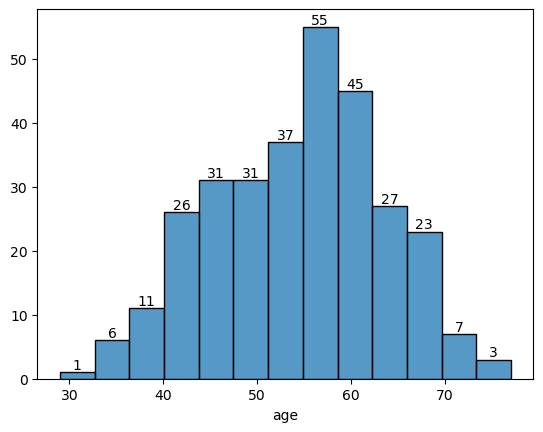

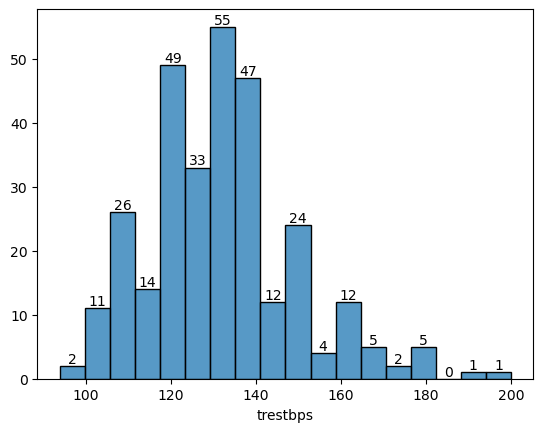

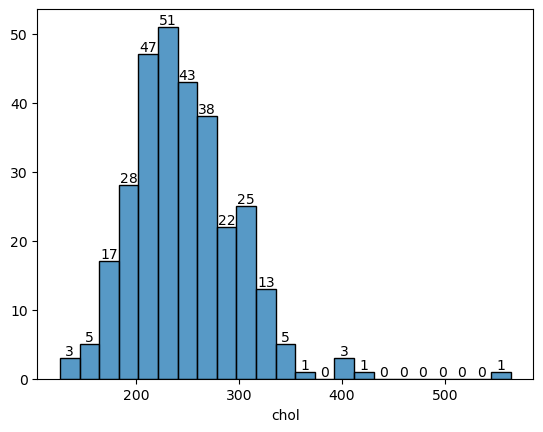

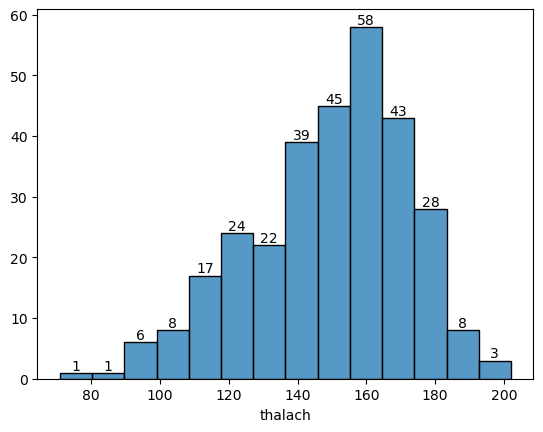

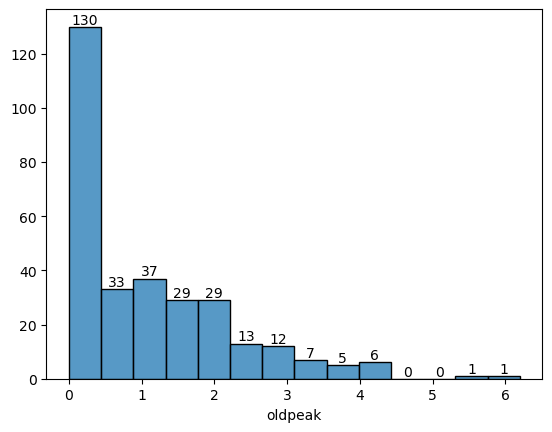

In [13]:
# List of continuous variables
cont_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for col in cont_cols:
    p=sns.histplot(data=heart, x=col)
    plt.ylabel("")
    p.bar_label(p.containers[0])
    plt.show()

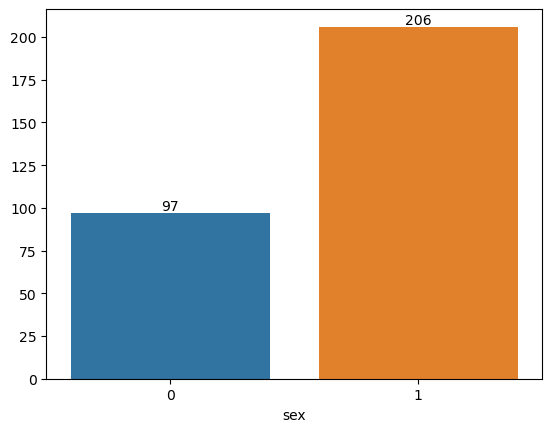

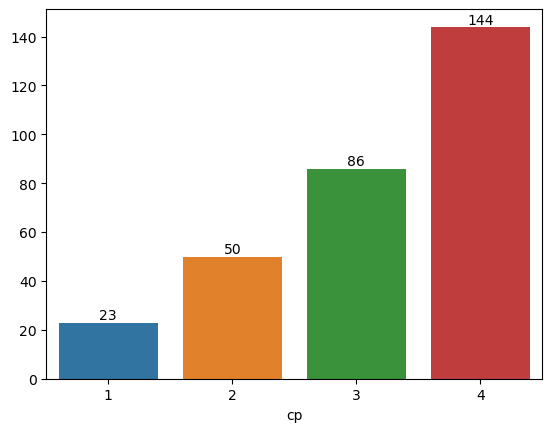

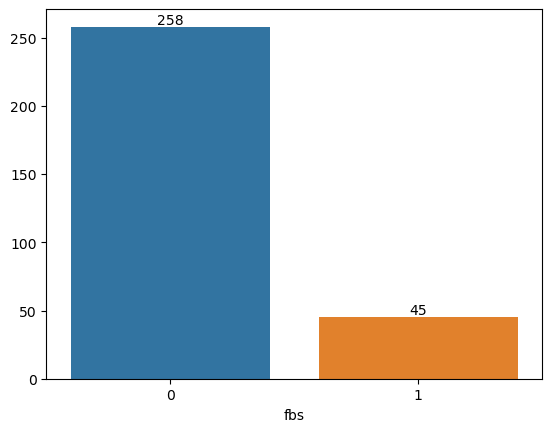

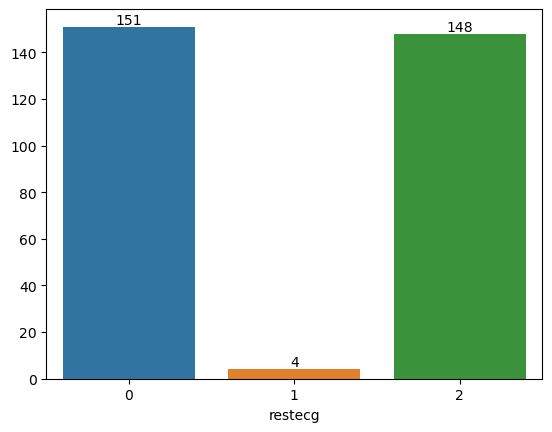

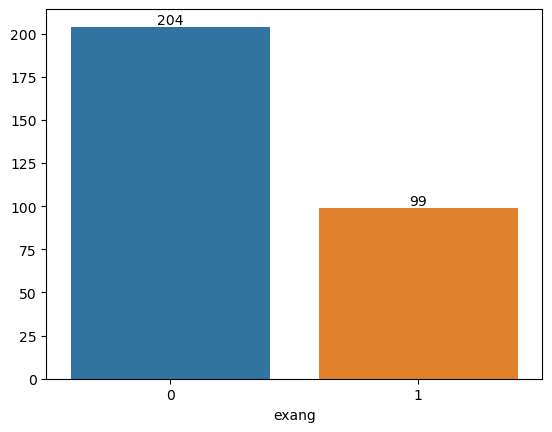

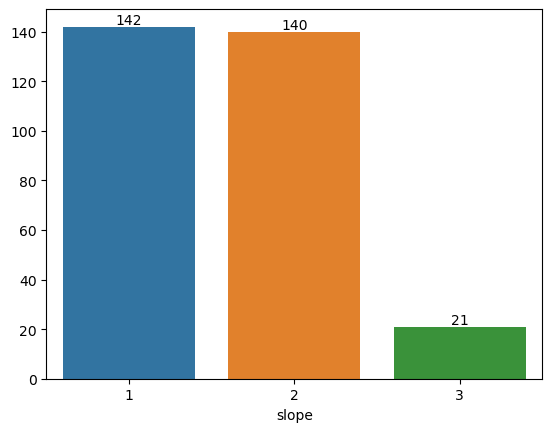

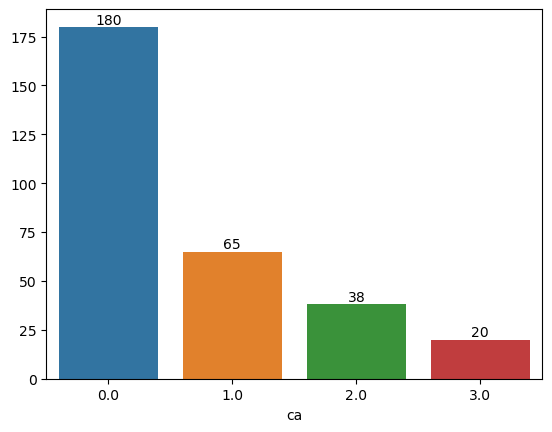

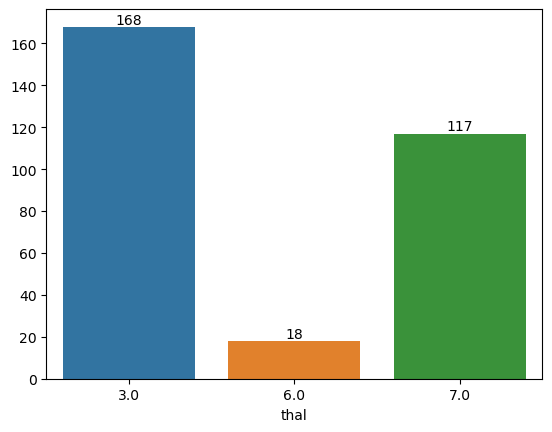

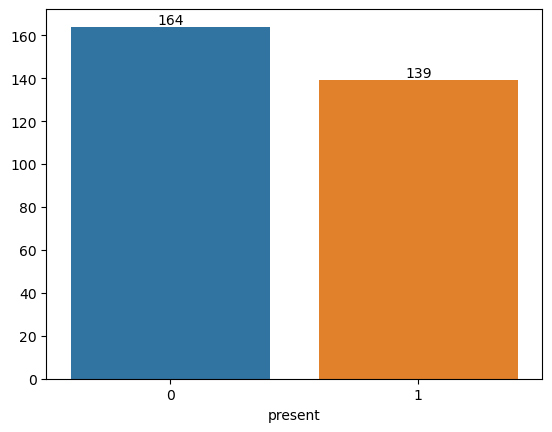

In [14]:
# List of categorical variables
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "present"]

for col in cat_cols:
    p=sns.countplot(data=heart, x=col)
    plt.ylabel("")
    p.bar_label(p.containers[0])
    plt.show()

Now we can look at the features in relation to the target, "present", wether someone has heart disease or not 

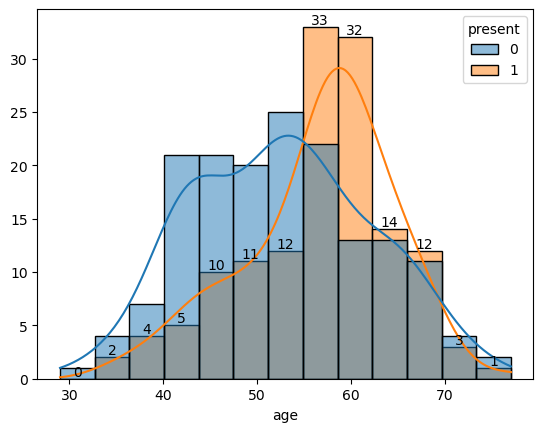

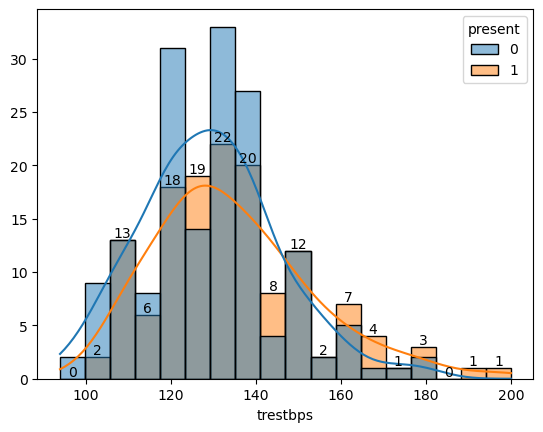

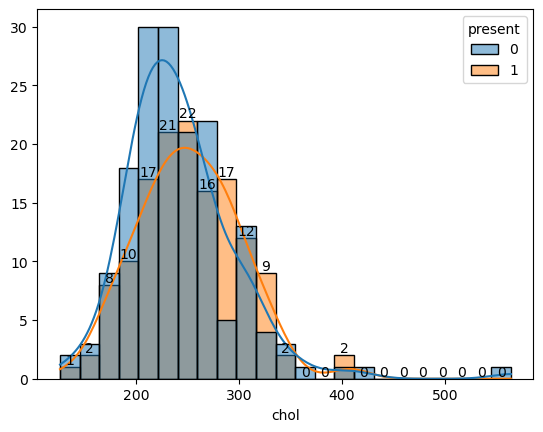

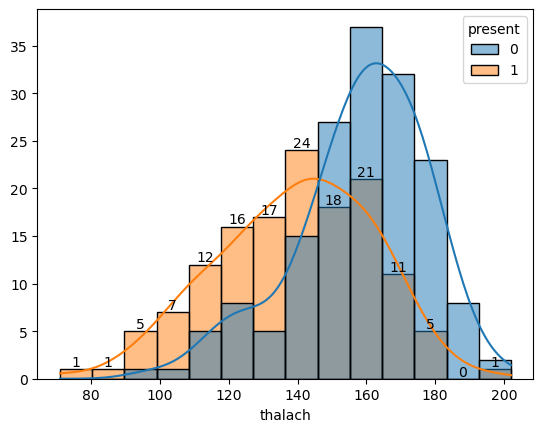

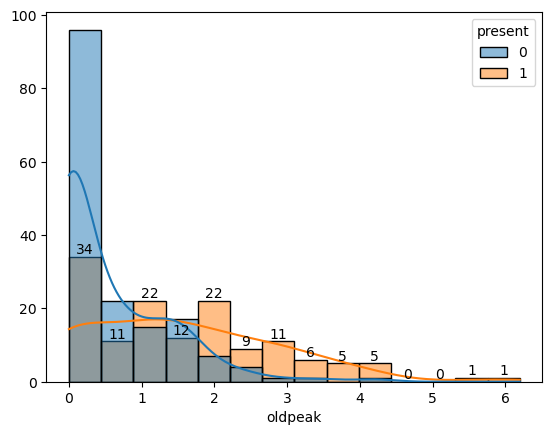

In [15]:
cont_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for col in cont_cols:
    p=sns.histplot(data=heart, x=col,hue="present", kde=True)
    p.bar_label(p.containers[0])
    plt.ylabel("")
    plt.show()

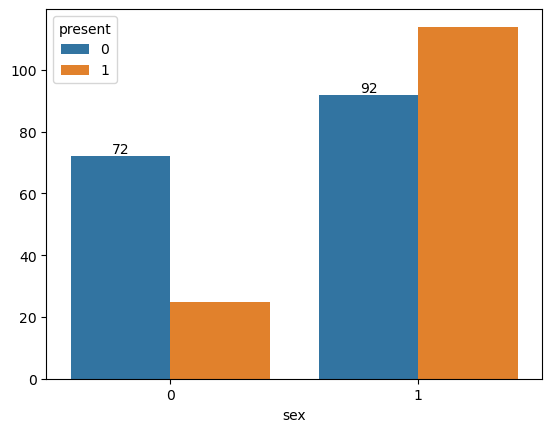

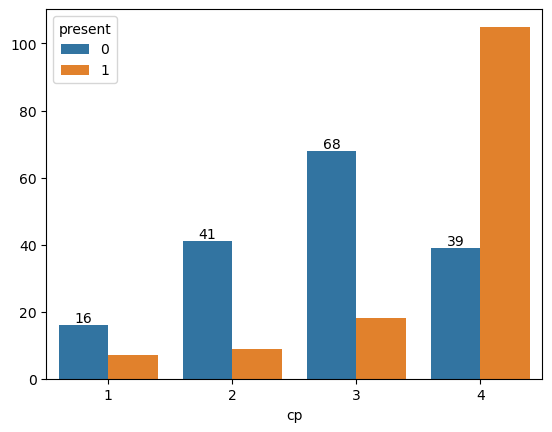

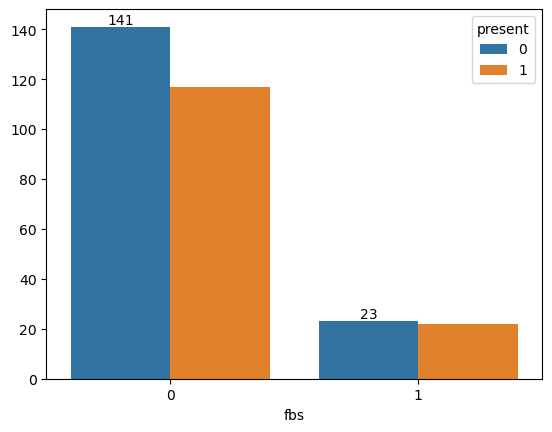

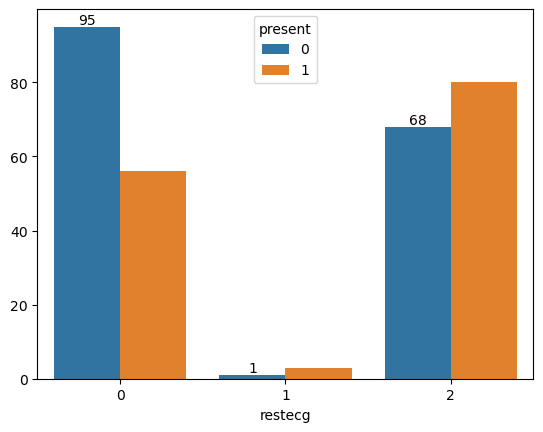

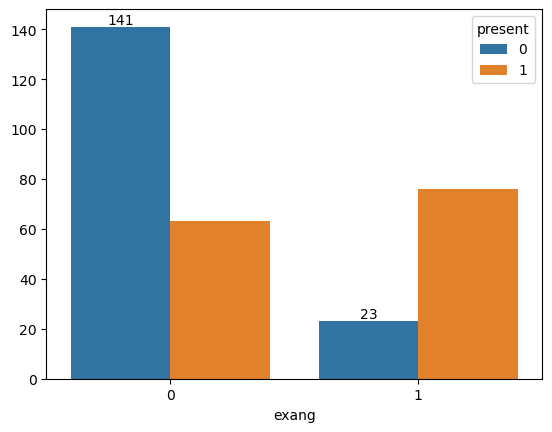

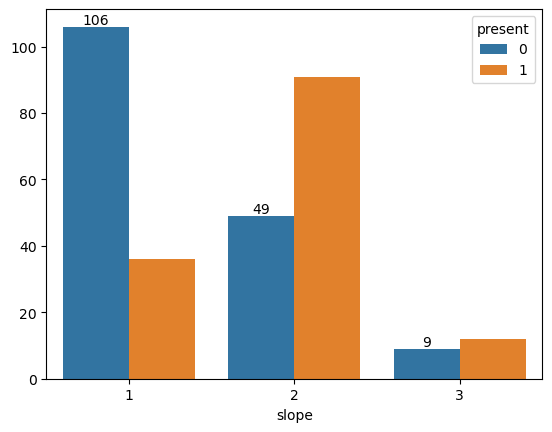

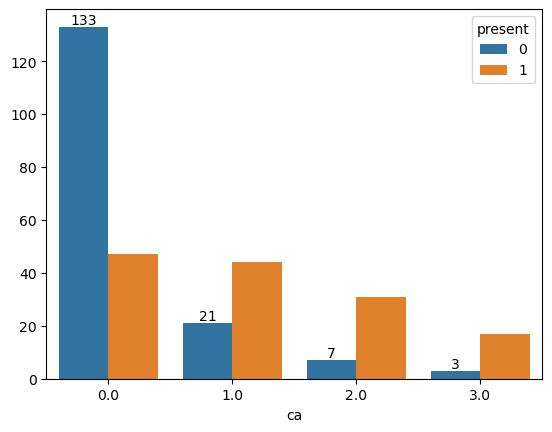

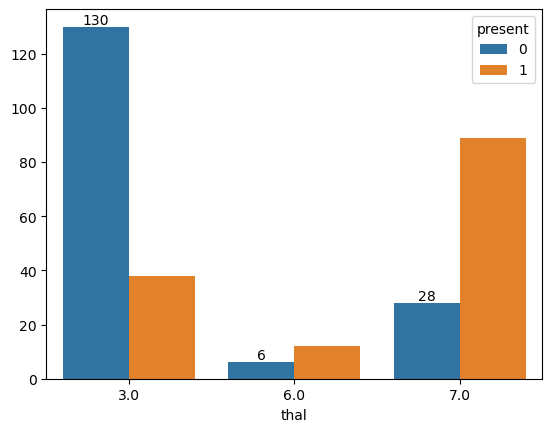

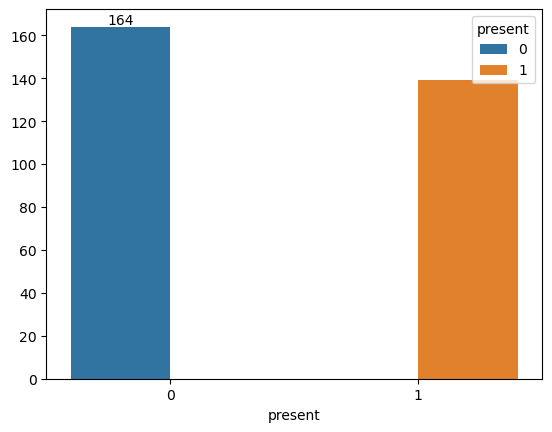

In [16]:
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "present"]

for col in cat_cols:
    p=sns.countplot(data=heart, x=col,hue="present")
    plt.ylabel("")
    p.bar_label(p.containers[0])
    plt.show()

# Insights gained from diagrams

* Patients with heart disease tend to be older around the  age of 60 
* There is some evidence to indicate that higher Trestbps and Chol relate to having heart disease
* Patients with lower maximum heart rate tend to have heart disease
* Those with heart disease tend to have a higher oldpeak value

---------------------------------------------------------------------------
Now we can look at the correlation between each categorical feature  and target ("present")

In [17]:
for col in cat_cols:
    cross= pd.crosstab(heart[col],heart["present"],normalize=True)
    display(cross)

present,0,1
sex,,
0,0.237624,0.082508
1,0.303630,0.376238


present,0,1
cp,,
1,0.052805,0.023102
2,0.135314,0.029703
3,0.224422,0.059406
4,0.128713,0.346535


present,0,1
fbs,,
0,0.465347,0.386139
1,0.075908,0.072607


present,0,1
restecg,,
0,0.313531,0.184818
1,0.003300,0.009901
2,0.224422,0.264026


present,0,1
exang,,
0,0.465347,0.207921
1,0.075908,0.250825


present,0,1
slope,,
1,0.349835,0.118812
2,0.161716,0.300330
3,0.029703,0.039604


present,0,1
ca,,
0.0,0.438944,0.155116
1.0,0.069307,0.145215
2.0,0.023102,0.102310
3.0,0.009901,0.056106


present,0,1
thal,,
3.0,0.429043,0.125413
6.0,0.019802,0.039604
7.0,0.092409,0.293729


present,0,1
present,,
0,0.541254,0.000000
1,0.000000,0.458746


Based on the data exploration above, the best features that seem to have some causation towards having heart disease:

* age
* trestbps
* chol
* thalach
* sex
* cp
* restecg
* exang
* ca
* thal

In [18]:
# List of selected features
sel_features = ["age", "trestbps", "chol", "thalach", "sex", "cp", "restecg", "exang", "ca", "thal"]

# Dividing the data

In [19]:
# Create freatures X using 'sel_features' and target variable y
X = heart[sel_features]
y = heart["present"]

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [20]:
#counting number of cases in orignal data
n_cases=sum(y==1)
n_non_cases =sum(y==0)

#counting number of cases in split test data
n_test_cases=sum(y_test==1)
n_non_test_cases=sum(y_test==0)

#counting number of cases in split train data
n_train_cases=sum(y_train==1)
n_non_train_cases=sum(y_train==0)


print(f"The original data has {n_cases} number of cases and {n_non_cases} number of non_cases")
print(f"The split test data has {n_test_cases} number of cases and {n_non_test_cases} number of non_cases")
print(f"The split train data has {n_train_cases} number of cases and {n_non_train_cases} number of non_cases")


The original data has 139 number of cases and 164 number of non_cases
The split test data has 43 number of cases and 48 number of non_cases
The split train data has 96 number of cases and 116 number of non_cases


---------------------
From this it looks like the data is evenly spread and neither the test or train data is favoured 

# Building the model

To help our analysis and to see if the model and data is reliable we must have a look at:

* The accuracy of the model 
* The sensitivity of the model
* The specificity of the model
* Does the model perform better on non_cases or cases, or equally well?

In [21]:
#Constructing the model 
model = LogisticRegression(max_iter=800)

#Fit the model to data
model.fit(X_train,y_train)

#Make predicitions
y_pred = model.predict(X_train)

In [22]:
#Calculate the accuracy
train_acc = model.score(X_train,y_train)

#Figuring out the False/True negative and positives 
tn = sum((y_pred==0)&(y_train==0))
fn = sum((y_pred==0)&(y_train==1))
tp= sum((y_pred==1)&(y_train==1))
fp =sum((y_pred==1)&(y_train==0))

# Calculate sensitivity and specificity
sens_train = tp/(tp+fp)
spec_train = tn/(tn+fp)

print(f"There are {tn} true negatives and {fn} false negatives, there are {tp} true positives and {fp} false positives")

print(f"Training accuracy : {train_acc:.3f}")
print(f"Sensitivity: {sens_train:.3f}")
print(f"Specificity: {spec_train:.3f}")

There are 106 true negatives and 22 false negatives, there are 74 true positives and 10 false positives
Training accuracy : 0.849
Sensitivity: 0.881
Specificity: 0.914


* Accuracy of 0.849 indicates that the model has predicted the same result 84.9% of the same times as the actual data, y_train
* Sensitivity of 0.881 indicates that the model correctly identified 88.1% of the patients with heart disease as having heart disease 
* Specificity of 0.914 indicates the model correctly identified 91.4% of the patients without heart diease as not having it 

These measurements were calculated on the same dataset that the model was trained on. so could be prone to overfitting

# Interpreting the Model Coefficients

After building our logistic regression model, we can examine the coefficients to see if they align with our understanding of the problem. The logistic regression model relates the binary outcome to the linear combination of predictors through the link function:

$$log\Bigg(\frac{EY}{1-EY}\Bigg) = \beta_0 + \beta_1 X$$

The predictors impact the outcome on the log-odds scale. The non-intercept coefficients represent the log-odds ratio for a unit increase in the corresponding predictor:

$$log\Bigg(\frac{O_1}{O_0}\Bigg) = \beta_1$$

Here, $O_0$ represents the odds ratio when the predictor is `0`, and $O_1$ represents the odds ratio when the predictor is `1`. However, we are usually interested in examining these effects on the odds scale, so we take the exponential function `e` of both sides to get:

$$O_1 = e^{\beta_1}O_0$$

We can use these coefficients to examine the relationship between our selected predictors and the likelihood of having heart disease.


In [23]:
# Create empty DataFrame to store results
results_df = pd.DataFrame(columns=["feature", "coef", "log-odds", "odds"])

# Calculate coefficients in terms of log-odds
log_odds = [round(coef, 3) for coef in model.coef_[0]]
results_df["log-odds"] = log_odds

# Calculate odds and add to DataFrame
odds = [round(np.exp(coef), 3) for coef in model.coef_[0]]
results_df["odds"] = odds

# Add feature names and coefficients to DataFrame
results_df["feature"] = sel_features
results_df["coef"] = model.coef_[0]

# Print results
results_df

,feature,coef,log-odds,odds
0,age,-0.009894,-0.010,0.990
1,trestbps,0.017036,0.017,1.017
2,chol,0.005874,0.006,1.006
3,thalach,-0.024825,-0.025,0.975
4,sex,1.268127,1.268,3.554
5,cp,0.378571,0.379,1.460
6,restecg,0.134142,0.134,1.144
7,exang,1.048357,1.048,2.853
8,ca,1.450729,1.451,4.266
9,thal,0.322075,0.322,1.380


What this mean is that an increase of a unit of lets say age corresponds to an increase/decrease, in this case decrease of -0.010 log odds of having heart disease, this corresponds to a factor of 0.990 odds of having heart disease for each unit of age, this means as you get older you are more likely to get heart disease 

Another example is sex, in this case being male is assocaited with a 1.262 log odds increase in the odds of having heart disease or a 3.532 increased odds in having heart disease, makes sense as males are more likely to have heart disease. We know these odds are talking about males because male = 1 , after one-hot-encoding.


# Final Model Evaluation

We can now evaluate the Logistic Regression model on the testing data

In [24]:
# Make model predictions using test data
y_pred = model.predict(X_test)

Visualise the data

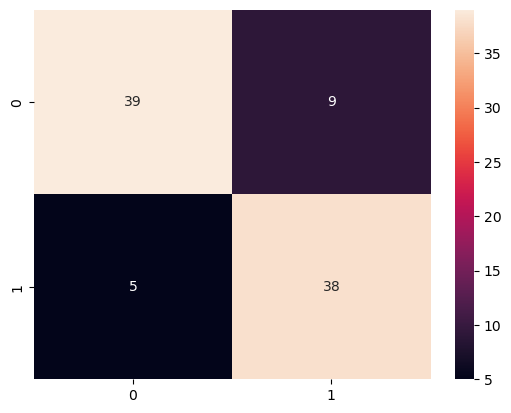

In [25]:
#Use a confusion matrx to visualise data
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True)
plt.show()

From this the model gives the wrong results 14 times and the correct reults 77 times

Computing accuracy, sensitivity, and specificity 

In [26]:
#Calculate the accuracy
acc = model.score(X_test,y_test)

#Figuring out the False/True negative and positives 
tn = sum((y_pred==0)&(y_test==0))
fn = sum((y_pred==0)&(y_test==1))
tp= sum((y_pred==1)&(y_test==1))
fp =sum((y_pred==1)&(y_test==0))

# Calculate sensitivity and specificity
sens_test = tp/(tp+fp)
spec_test = tn/(tn+fp)

print(f"There are {tn} true negatives and {fn} false negatives, there are {tp} true positives and {fp} false positives")

print(f"Testing accuracy : {acc:.3f}")
print(f"Sensitivity: {sens_test:.3f}")
print(f"Specificity: {spec_test:.3f}")

There are 39 true negatives and 5 false negatives, there are 38 true positives and 9 false positives
Testing accuracy : 0.846
Sensitivity: 0.809
Specificity: 0.812


The test accuracy of 0.846 is lower than that trianing data accuracy of 0.849,indicating our data is performing worse on the test data than on the train data. Also, the sensitivity on test data is 0.809 which is lower than train data which is 0.881,suggesting that the model is less sensitive in detecting positive cases in the test set than in the training set.
The test specificity of 0.812 is also lower than the training specificity of 0.914, indicating that the model is less specific in detecting negative cases in the test set than in the training set. Overall this indicates the model is overfit for the training data

## Deploying the model

In [27]:
import pickle

In [30]:
pickle.dump(model, open("Model.pkl","wb"))

# Drawing Conclusions

* Overall the model agrees with the interpretation of it, for example it makes sense for the likelihood of heart disease to increase with age, resting blood pressure, and serum cholesterol levels. Also Chest-pain and number of blood vessels show a positive correlation with heart disease. However the only outlier is maximum heart rate achieved. However the models interpreation aligns with what we thought of it before, but with everything further research into the variables will give us a better understanding of each feature.

* Model seems to predict non-cases better than cases, as indicated by the the specifity being higher than sensitivity. This could be due to the fact that heart disease is in general rarer among the general population, so the model will naturally become better at finding those that are non-cases

* The accuracy of the model is 0.846 or 84.6%, meaning the model predicts the correct results rouhgly 85% of the time.However, as high as this may be, in the context of the problem a higher accuracy would be more ideal,as this is a serious issue which has to do with peoples' lives. Instead this model can be used as an aid in the diagnosis process rather than being the only way of diagnosing potential patients